Import packages and self-defined functions

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable

from basic_exploration_turbulence_from_h5_files import \
    get_instant_data_y_ct_from_h5_file
from SOM_wall import add_colorbar, plot_predictions
from SOM_horizontal_plane_susi_som import *
from susi_som import SOMClustering

Build the horizontal plane dataset (16 standarized features) as ndarray (Data) and as dataframe (DF)
Eliminate x_s and z_s from the SOM training dataset (14 standarized features) as ndarray (Data_red)

In [2]:
# Get dataset of 16 standarized features, as ndarray 'data'
File_Name = "JHTDB_standarized_features/JHTDB_time_10-0_n_831x512_y_0-03_standarized_features.h5"
Data, DF = construct_ndarray_from_standarized_features_h5file(File_Name, sampling = 2)
Feature_Names = DF.keys()

# Remove x_s and z_s from clustering dataset, we will not use it for training the algorithm:
n_features_reduced = 2
Data_red = Data[:,:-n_features_reduced]
Feature_Names_red = Feature_Names[:-n_features_reduced]

Train SOM clustering and plot the 'best matching units' and the 'u-matrix' every 'bmu_umatrix_freq' training iterations 

unsuper:   0%|                                                          | 0/1000001 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 212736 out of 212736 | elapsed:   55.7s finished
unsuper: 100%|██████████████████████████████████████████| 1000001/1000001 [14:13<00:00, 1171.50it/s]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 212736 out of 212736 | elapsed:   52.7s finished


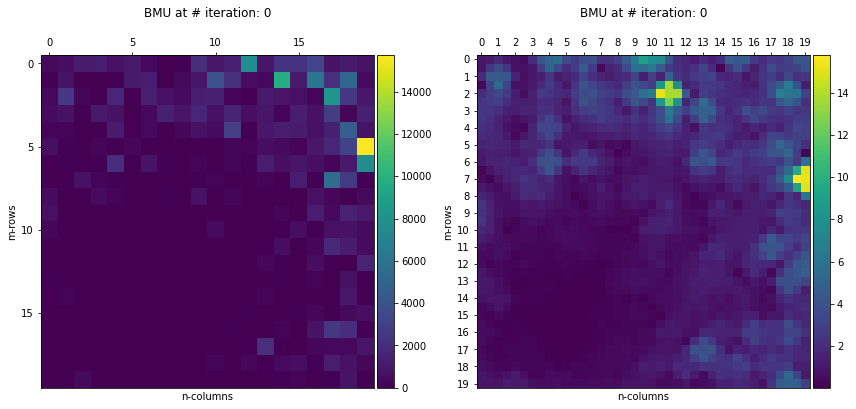

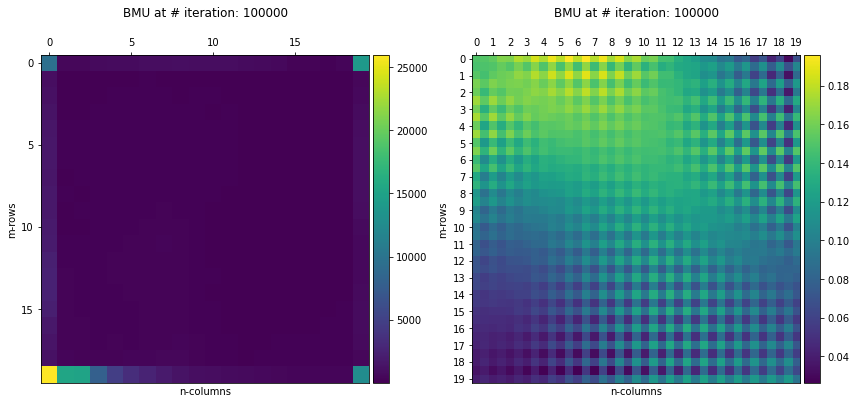

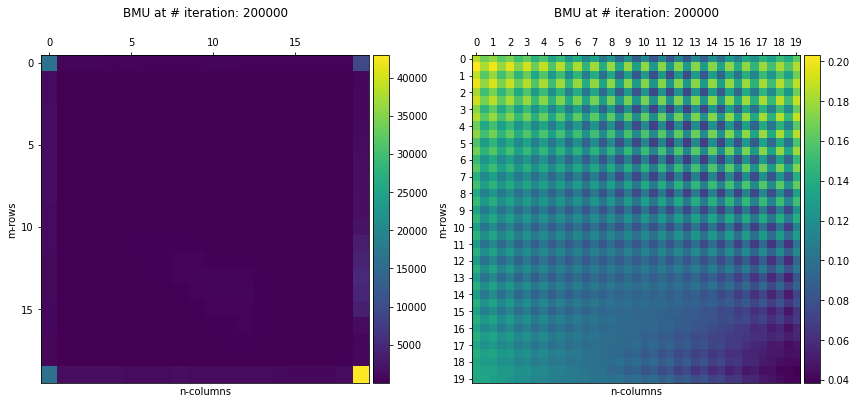

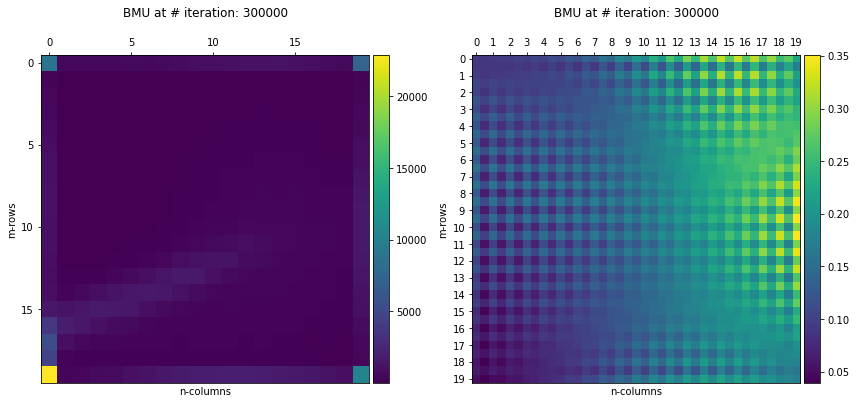

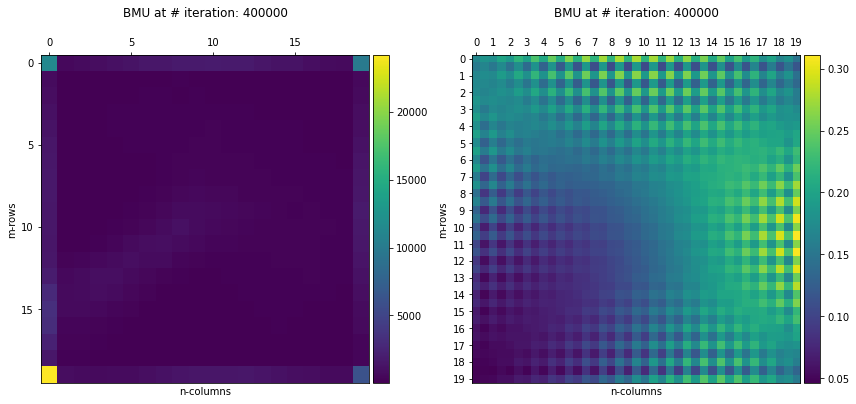

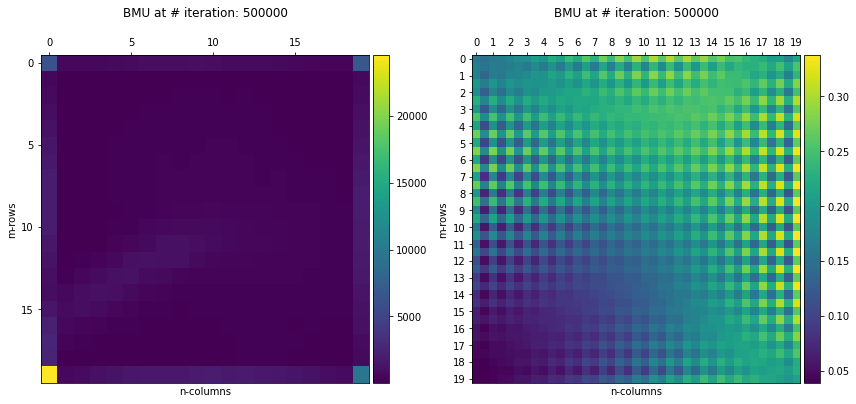

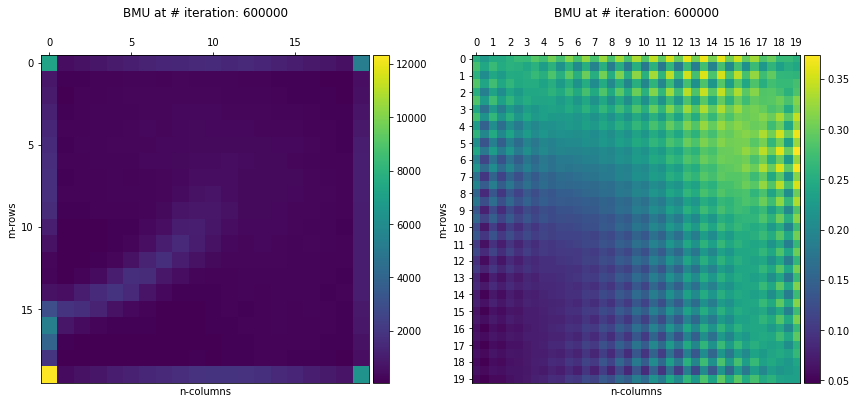

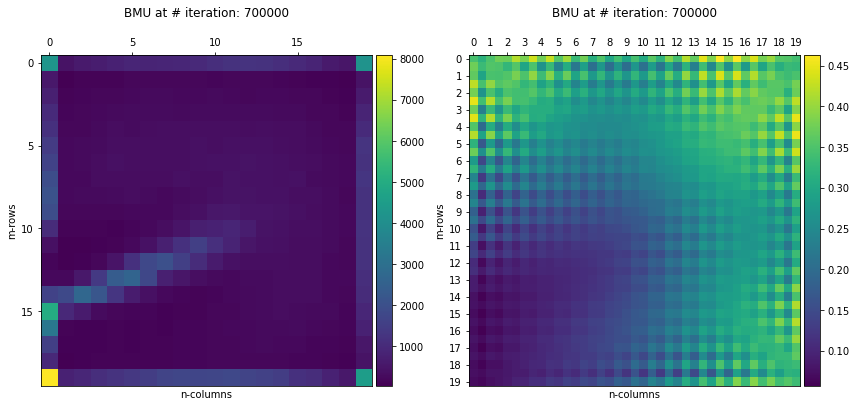

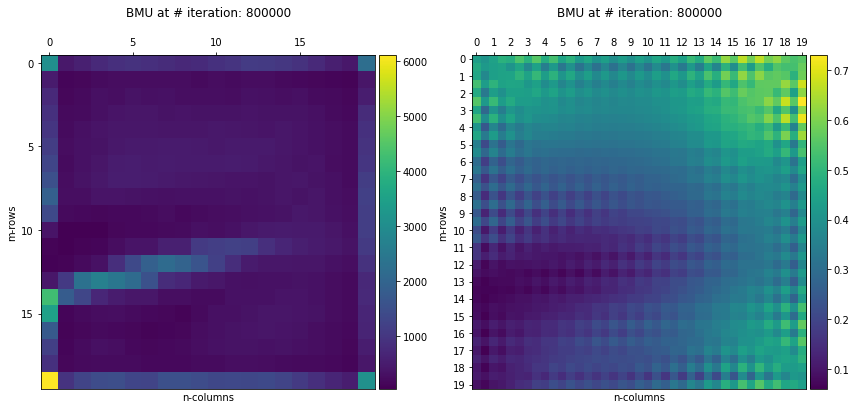

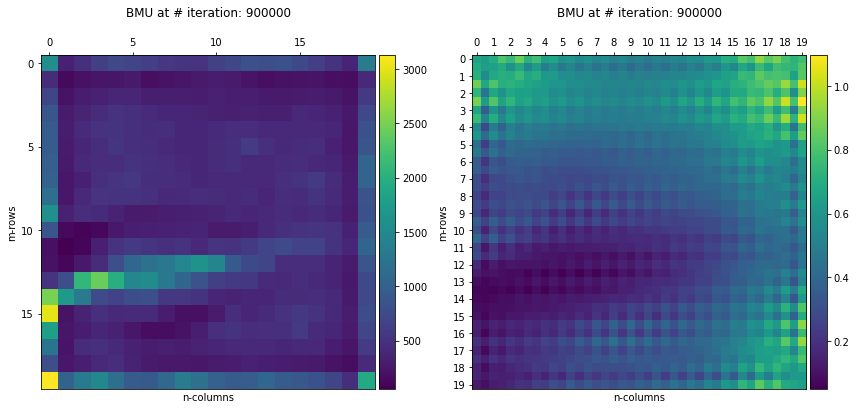

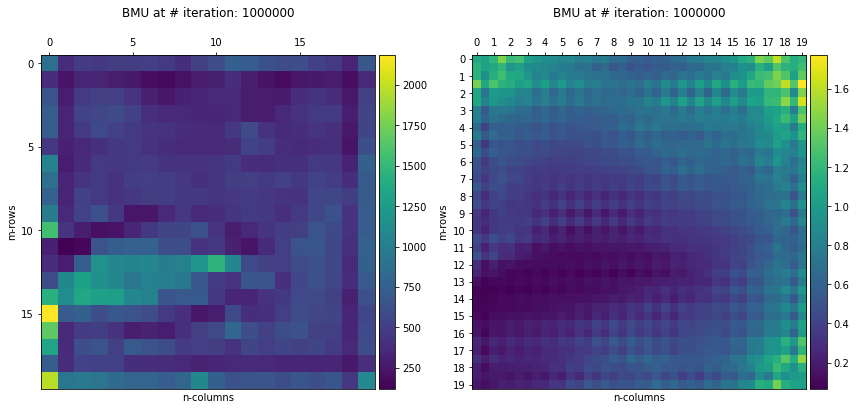

In [3]:
bmu_umatrix_freq = 100000
som, DF = single_SOMClustering(data = Data_red, df=DF, m=20, n=20, 
                                lr_start=1, lr_end= 0.001, n_iter=1000001,
                                bmu_umatrix_storing=True, bmu_umatrix_storing_frequency=bmu_umatrix_freq, 
                                make_final_plots=False)
plt.show() 